In [53]:
# import statements
import os
%matplotlib inline
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as img

In [54]:
dark_current_45s = 44.060961168781205
    # As found from alignmentreduction.ipynb

In [55]:
# Stars as shown
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data\\m42')
fn_q1_q4 = "horseshoe.png"
fn_q2 = "triangle.png"
fn_q3 = "fivestarsq3.png"

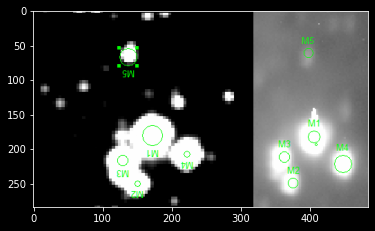

In [56]:
# Finder charts vs FITS images

# Q1 and Q4 finder chart stars ("horseshoe")
im = img.imread(fn_q1_q4)
plt.imshow(im, origin='upper')

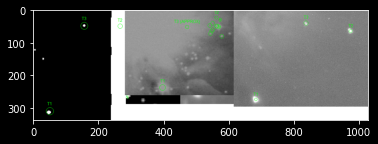

In [57]:
# Q2 finder chart stars ("triangle")
im = img.imread(fn_q2)
plt.imshow(im, origin='upper')

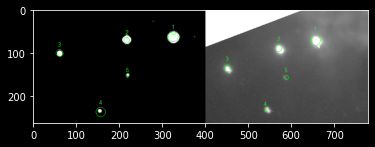

In [58]:
# Q3 finder chart stars (I dunno, an arrow, maybe?)
im = img.imread(fn_q3)
plt.imshow(im, origin='upper')

In [59]:
# Main stars used:
# Q1, Q4, Q2 (I): tet01 ori c
# Q2 (B and V): V* KS Ori
# Q3: tet02 Ori A

# COPY/PASTED SIMBAD COORDS OF MATCHED STARS FROM OUR IMAGES
# TRAPEZOID (Q3)
# 1: {083.8454321129830 -05.4160655533618 0.1994 0.2051 90 {* tet02 Ori A} SB* 0.006 1.380 2.2153 0.000063 6.30 6.39 O9.5IVp}
# 2: {083.8600078271642 -05.4168920419063 0.0645 0.0734 90 {* tet02 Ori B} YSO 1.467 0.077 2.4459 0.000095 6.29 6.38 B2-B5}
# 3: {083.8809696497211 -05.4212186958393 0.0397 0.0435 90 {* tet02 Ori C} Orion_V* 2.367 3.524 2.4229 0.000100 7.80 8.24 B4V}
# 4: {083.8684427811187 -05.4389912158238 0.0751 0.0669 90 {V* V1073 Ori} Orion_V* 0.184 0.909 2.5965 0.000080 9.64 9.52 B9.5V}
# 5: {083.8597962569978 -05.4278467998531 0.0581 0.0648 90 {V* AK Ori} Orion_V* 0.124 2.175 2.4376 0.000096 12.859 12.082 G5:}

# HORSESHOE (Q1 & Q4 & Q2I)
# 1: {083.8186161063084 -05.3896988630991 0.2664 0.2532 90 {* tet01 Ori C} ** 2.111 -0.588 2.7066 0.000082 5.15 5.13 O7Vp}
# 2: {083.8172302422873 -05.3852220643495 0.0454 0.0492 90 {* tet01 Ori B} EB* 1.459 1.030 2.4824 0.000087 8.20 7.96 B1V}
# 3: {083.8159444718486 -05.3873198195769 0.0657 0.0724 90 {* tet01 Ori A} Ae* 1.536 0.123 2.3731 0.000094 6.75 6.73 B0V}
# 4: {083.8219120301588 -05.3879405613796 0.0456 0.0521 90 {* tet01 Ori D} YSO 1.836 0.165 2.1166 0.000108 6.79 6.70 B1.5Vp}
# 5: {083.8164575426527 -05.3972134626181 0.3620 0.3490 90 {V* V2279 Ori} Orion_V* 2.796 -4.783 0.7897 0.000076 13.648 12.730 M0.5+M2}

# TRIANGLE (Q2B & Q2V)
# T1: {083.7909916121930 -05.4647868257898 0.0462 0.0452 90 {HD  36982} Orion_V* 1.482 1.610 2.4474 0.000127 8.58 8.46 B1.5Vp}
# T2: {083.7505457414543 -05.4211763792293 0.0434 0.0419 90 {V* KS Ori} Orion_V* 2.936 -2.707 2.6985 0.000067 10.34 10.19 A0V}
# T3: {083.7734900570550 -05.4220933749747 0.0373 0.0342 90 {V* LL Ori} Orion_V* 1.654 -0.334 2.5514 0.000097 12.309 11.517 K0-K3e}


coords_stars = []


In [60]:
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7')

images_Q1 = glob.glob('**/reduced_m42_image_*_Q1.FITS')
images_Q2 = glob.glob('**/reduced_m42_image_*_Q2.FITS')
images_Q3 = glob.glob('**/reduced_m42_image_*_Q3.FITS')
images_Q4 = glob.glob('**/reduced_m42_image_*_Q4.FITS')

images_uncertainty_Q1 = glob.glob("**/reduced_m42_uncertainty_*_Q1.FITS")
images_uncertainty_Q2 = glob.glob("**/reduced_m42_uncertainty_*_Q2.FITS")
images_uncertainty_Q3 = glob.glob("**/reduced_m42_uncertainty_*_Q3.FITS")
images_uncertainty_Q4 = glob.glob("**/reduced_m42_uncertainty_*_Q4.FITS")

m42_list = images_Q1, images_Q2, images_Q3, images_Q4
m42_uncertainty_list = images_uncertainty_Q1, images_uncertainty_Q2, images_uncertainty_Q3, images_uncertainty_Q4

coords_list =[[330, 577, 319, 469, 382, 566], [214, 329, 308, 245, 195, 323],
             [87, 299, 55, 306, 115, 294], [383, 238, 394, 206, 301, 170]]
             # Center coordinates of finder star in each filter image [Q1:Q4]
             # IVB, VIB, IVB, IVB
             # In files: BIV

<ipython-input-62-e51b4bc51ecc>:62: RuntimeWarning: invalid value encountered in true_divide
  bigim = (np.nan_to_num(bigim1)+np.nan_to_num(bigim2)+np.nan_to_num(bigim3)) / (totalcounts)
<ipython-input-62-e51b4bc51ecc>:67: RuntimeWarning: invalid value encountered in true_divide
  bigim_uncertain = (np.nan_to_num(bigim1_uncertain)+np.nan_to_num(bigim2_uncertain)+np.nan_to_num(bigim3_uncertain)) / (totalcounts_uncertain)


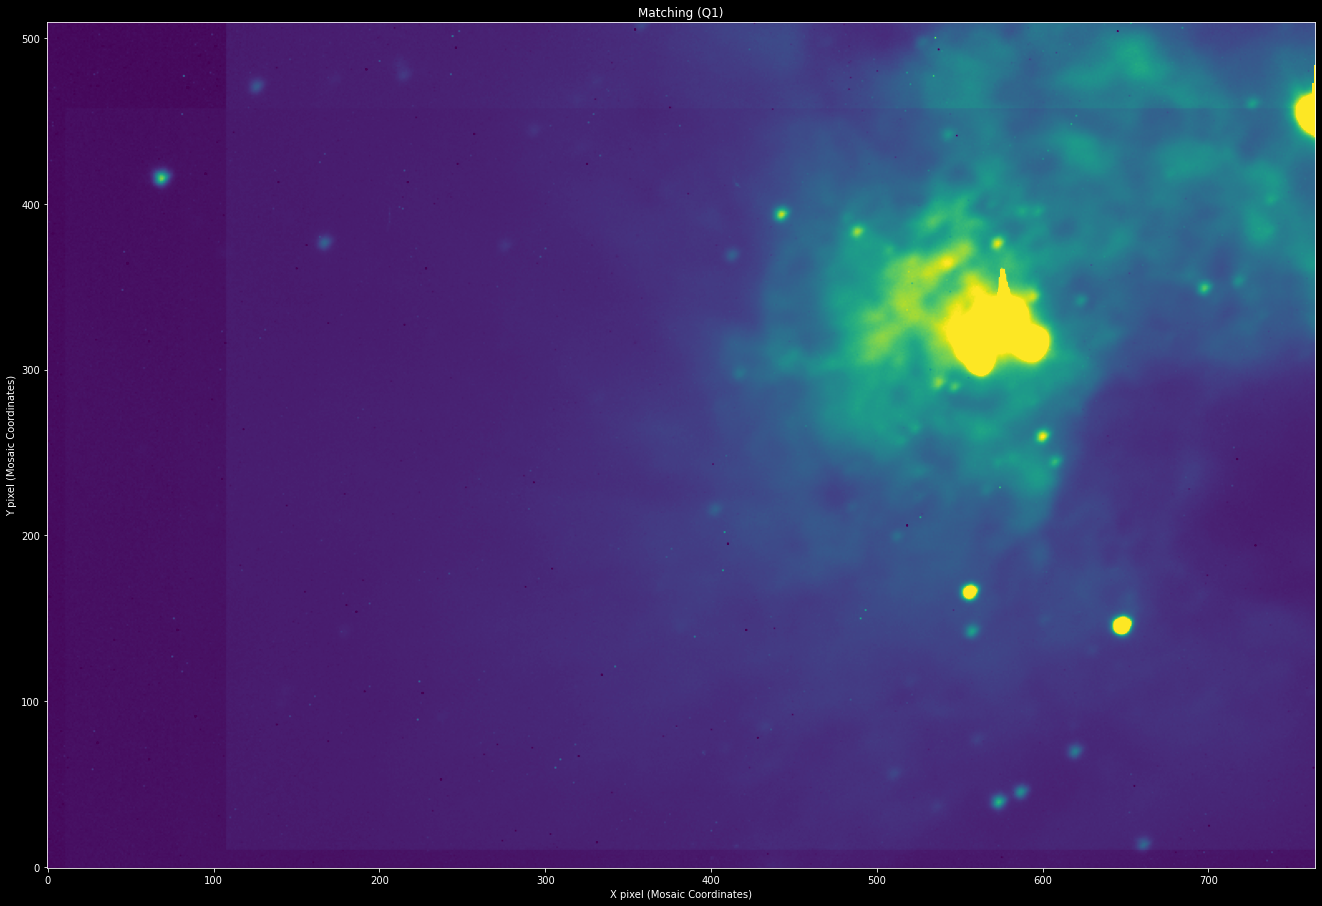

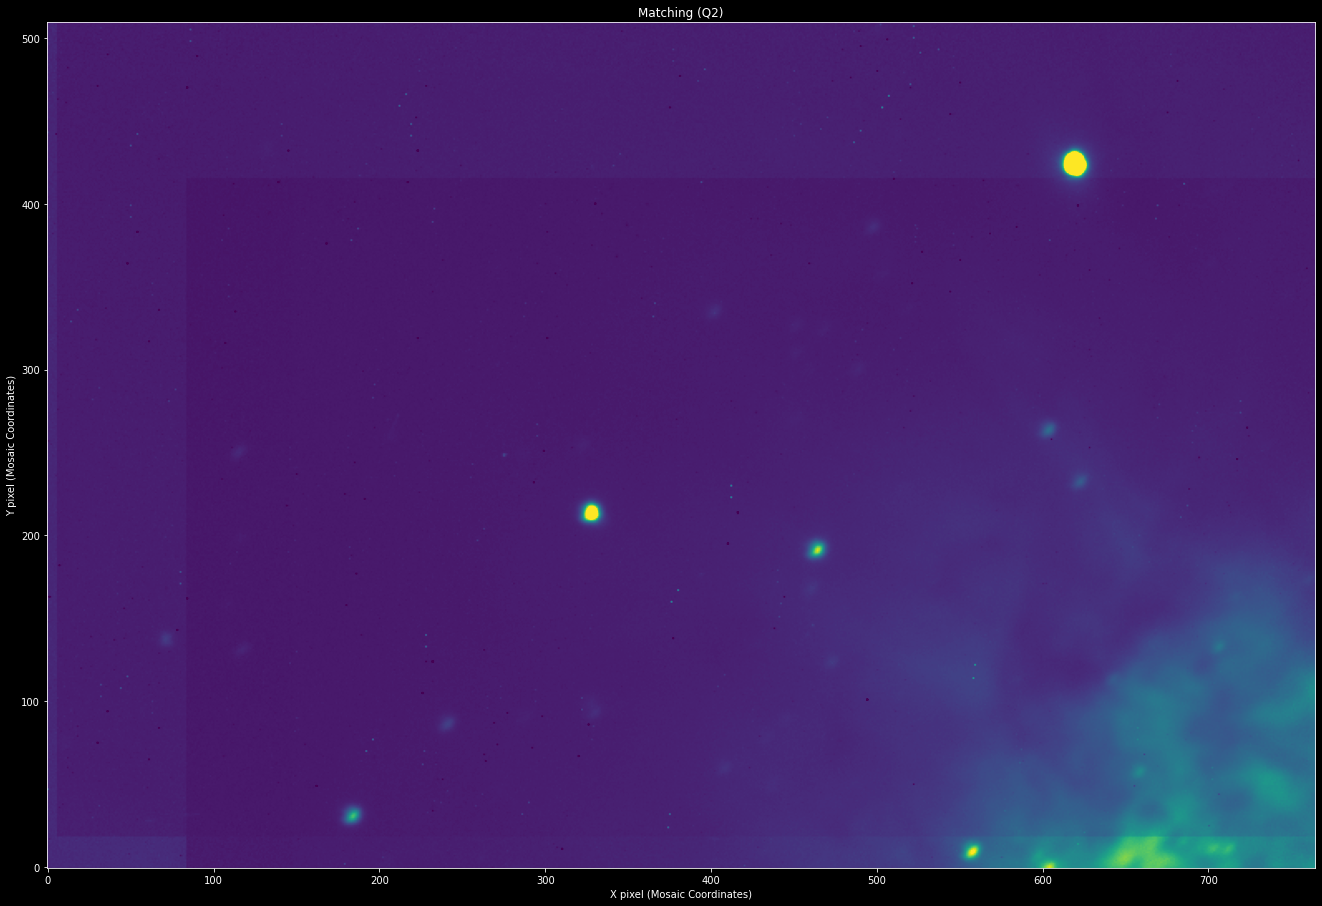

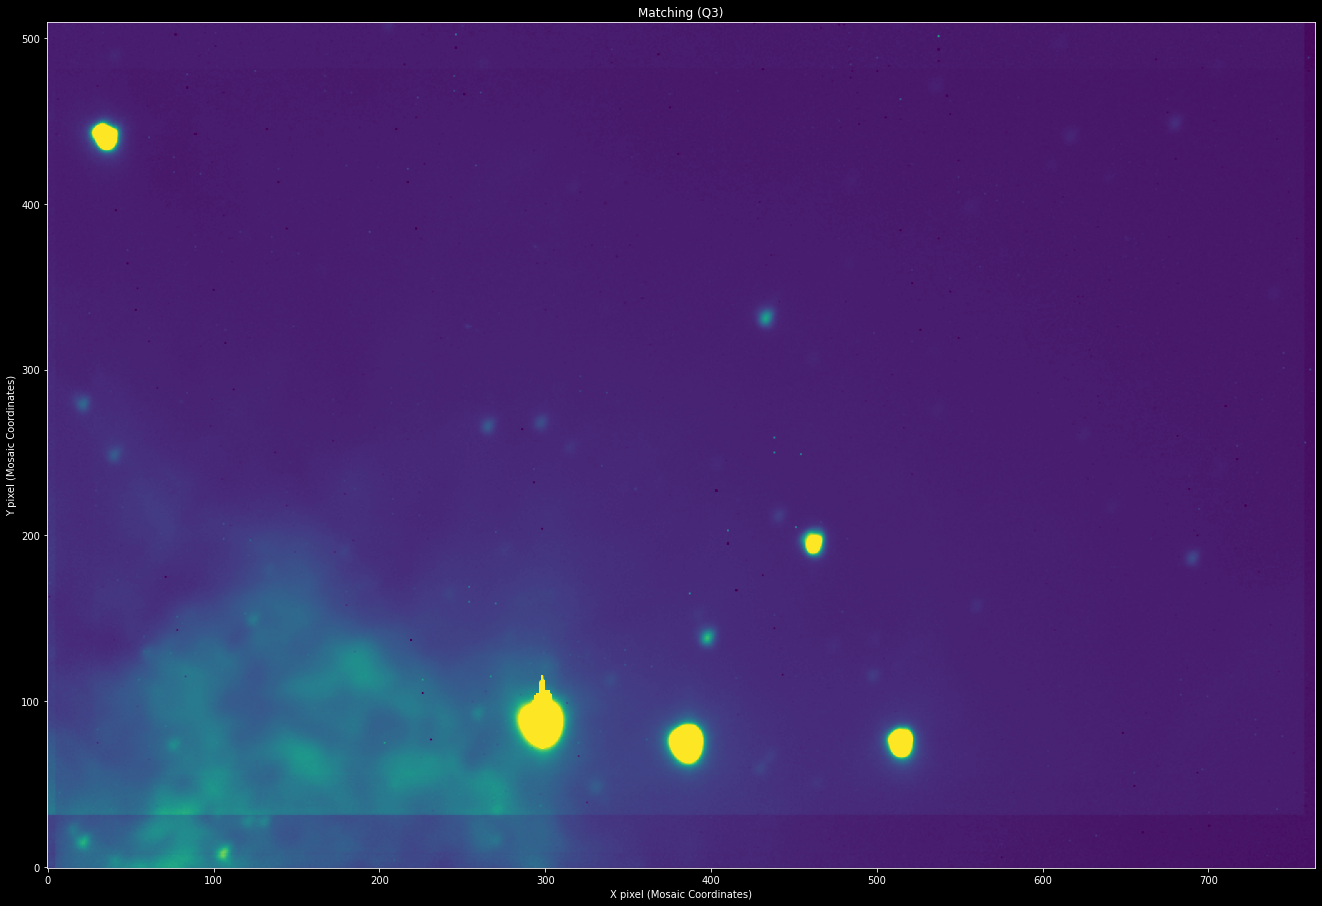

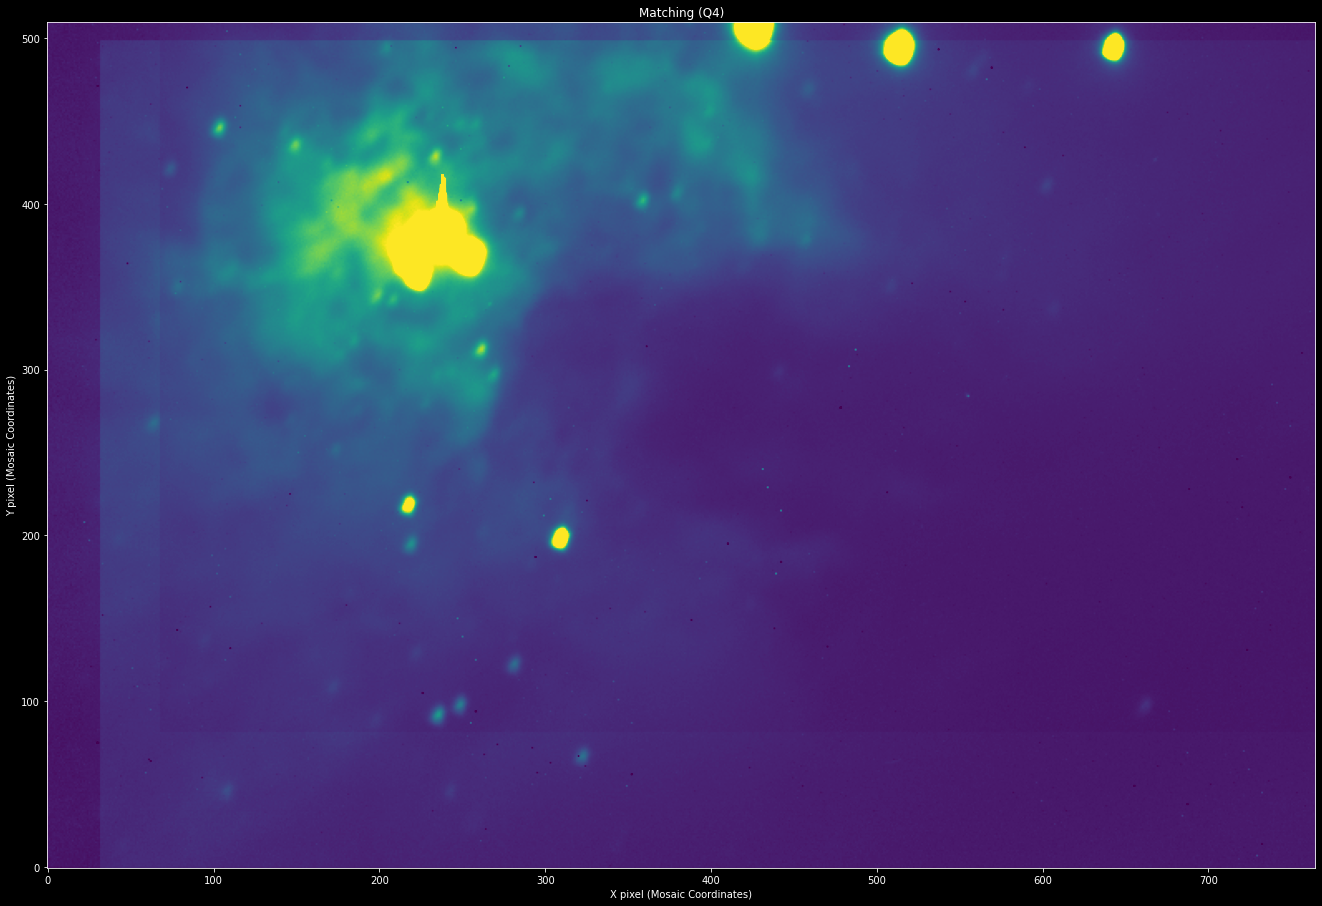

In [62]:
quad = 1

for current_file_list in m42_list:
    os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7')

    current_uncertainty = [fits.getdata(x) for x in m42_uncertainty_list[quad-1]]

    x_1, y_1 = coords_list[quad-1][0], coords_list[quad-1][1]
    x_2, y_2 = coords_list[quad-1][2], coords_list[quad-1][3]
    x_3, y_3 = coords_list[quad-1][4], coords_list[quad-1][5]

    # Differences
    # Diff of star 1 between first and second images of quadrant [quad] and filter [current_filter]
    x_12 = x_1 - x_2
    y_12 = y_1 - y_2

    # Diff of star 1 between first and third images ""
    x_13 = x_1 - x_3
    y_13 = y_1 - y_3

    current_timestream = [fits.getdata(x) for x in current_file_list]
    image1 = current_timestream[1]
    uncertainty1 = current_uncertainty[1]
    image2 = current_timestream[2]
    uncertainty2 = current_uncertainty[2]
    image3 = current_timestream[0]
    uncertainty3 = current_uncertainty[0]

    if quad == 2:
        image1 = current_timestream[2]
        uncertainty2 = current_uncertainty[2]
        image2 = current_timestream[1]
        uncertainty1 = current_uncertainty[1]
        image3 = current_timestream[0]
        uncertainty3 = current_uncertainty[0]

    bigim1 = np.zeros([1530,2295])*np.nan
    bigim2 = np.zeros([1530,2295])*np.nan
    bigim3 = np.zeros([1530,2295])*np.nan
    bigim1_uncertain = np.zeros([1530,2295])*np.nan
    bigim2_uncertain = np.zeros([1530,2295])*np.nan
    bigim3_uncertain = np.zeros([1530,2295])*np.nan

    bigim1[510:1020, 765:1530] = image1[:,:]
    bigim1_uncertain[510:1020, 765:1530] = uncertainty1[:,:]
    bigim2[510 + x_12:1020 + x_12, 765 + y_12:1530 + y_12] = image2[:,:]
    bigim2_uncertain[510 + x_12:1020 + x_12, 765 + y_12:1530 + y_12] = uncertainty2[:,:]
    bigim3[510 + x_13:1020 + x_13, 765 + y_13:1530 + y_13] = image3[:,:]
    bigim3_uncertain[510 + x_13:1020 + x_13, 765 + y_13:1530 + y_13] = uncertainty3[:,:]

    counts1 = np.isfinite(bigim1).astype('int')
    counts2 = np.isfinite(bigim2).astype('int')
    counts3 = np.isfinite(bigim3).astype('int')
    counts1_uncertain = np.isfinite(bigim1_uncertain).astype('int')
    counts2_uncertain = np.isfinite(bigim2_uncertain).astype('int')
    counts3_uncertain = np.isfinite(bigim3_uncertain).astype('int')

    totalcounts = counts1+counts2+counts3
    totalcounts_uncertain = counts1+counts2+counts3


    bigim = (np.nan_to_num(bigim1)+np.nan_to_num(bigim2)+np.nan_to_num(bigim3)) / (totalcounts)
    bigim[(totalcounts) == 0] = np.nan
    bigim[bigim == 0] = np.nan
    bigim_cutoff = bigim[510:1020, 765:1530]

    bigim_uncertain = (np.nan_to_num(bigim1_uncertain)+np.nan_to_num(bigim2_uncertain)+np.nan_to_num(bigim3_uncertain)) / (totalcounts_uncertain)
    bigim_uncertain[(totalcounts) == 0] = np.nan
    bigim_uncertain[bigim == 0] = np.nan
    bigim_cutoff_uncertain = bigim[510:1020, 765:1530]

    pl.figure(figsize=(50,50))

    im = pl.subplot(1,2,1).imshow(bigim_cutoff, vmax = 1800, vmin=0)
    _=pl.title("Matching (Q" + str(quad) + ")")
    _=pl.xlabel("X pixel (Mosaic Coordinates)")
    _=pl.ylabel("Y pixel (Mosaic Coordinates)")
    #
    os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\masterfiles')
    filehandle = fits.PrimaryHDU(data=bigim_cutoff_uncertain)
    filehandle.writeto('m42_mosaic_Q' + str(quad) + "_uncertainty.fits", overwrite=True)
    quad += 1

    del current_timestream


In [ ]:
# darksub_B_timestream = [im - median_dark_30s for im in images]
# processed_median_combined_images = np.median(darksub_B_timestream, axis=0)
# flat_darksub_science_images = [im / average_flat_B_biassub_norm for im in darksub_B_timestream]
#
# processed_median_combined_images = np.median(flat_darksub_science_images, axis=0)
#
# pl.figure(figsize=(25,25))
#
# for ii in range(3):
#     ax = pl.subplot(2,2,ii+1)
#     ax.imshow(flat_darksub_science_images[ii][318:368,358:408], origin='lower', vmax=400, vmin=0)
#     ax.plot(25, 25, 'kx', markersize=20)
#
# ax = pl.subplot(2,2,4)
# ax.imshow(processed_median_combined_images[318:368,358:408], origin='lower', vmax=400, vmin=0)
# ax.plot(25, 25, 'kx', markersize=20)
#
# ax.set_title("Median Stack")

In [ ]:
# im0 = np.roll(np.roll(flat_darksub_science_images[1], -1, axis=1), -1, axis=0)
# im1 = flat_darksub_science_images[0] # this is our "reference image", it stays put
#
# im2 = np.roll(np.roll(flat_darksub_science_images[2], 2, axis=1), -2, axis=0)
# rolled_images = [im1,im0,im2]
# rolled_median_B = np.median(rolled_images, axis=0)

In [ ]:
# pl.figure(figsize=(25,25))
#
# for ii in range(3):
#     ax = pl.subplot(2,2,ii+1)
#     ax.imshow(rolled_images[ii][318:368,358:408], origin='lower', vmax=400, vmin=0)
#     ax.plot(25, 25, 'kx', markersize=20)
#
# ax = pl.subplot(2,2,4)
# ax.imshow(rolled_median_B[318:368,358:408], origin='lower', vmax=400, vmin=0)
# ax.plot(25, 25, 'kx', markersize=20)
#
# ax.set_title("Median Stack")

